<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/LeNET_5_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the  Libraries:

# Using Tensorflow and Keras for Neural Network Programming:

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

In [ ]:
(X_train,y_train),(X_test,y_tests) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

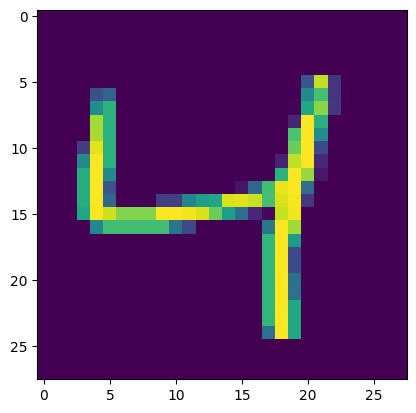

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

# Creating a LeNet CNN Model:

In [ ]:
model = Sequential()
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5), padding='valid', activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_9             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation:

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow .keras.callbacks import EarlyStopping
bepoch = EarlyStopping(monitor='val_accuracy',
                       min_delta=0.00001,
                       patience=5,
                       mode="auto",
                       verbose=1,
                       baseline=None,
                       restore_best_weights=True)

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=bepoch)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9012 - loss: 0.3390 - val_accuracy: 0.9788 - val_loss: 0.0685
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9775 - loss: 0.0700 - val_accuracy: 0.9843 - val_loss: 0.0538
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9852 - loss: 0.0468 - val_accuracy: 0.9827 - val_loss: 0.0582
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9869 - loss: 0.0379 - val_accuracy: 0.9847 - val_loss: 0.0534
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9849 - val_loss: 0.0523
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9832 - val_loss: 0.0560
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9865 - val_loss: 0.0481
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9931 -

In [ ]:
model.layers[0].get_weights()

[array([[[[-0.04187014,  0.200514  , -0.05770235,  0.24200365,
            0.07658379, -0.10935389]],
 
         [[ 0.02602804,  0.04753378,  0.25103676,  0.26361036,
            0.05918228,  0.03340981]],
 
         [[-0.29521823, -0.24524954,  0.10884803,  0.08137528,
           -0.04852712, -0.17402278]],
 
         [[-0.05083965, -0.1869385 ,  0.1212798 , -0.20413259,
            0.11287405,  0.03068295]],
 
         [[ 0.20646892, -0.08456281,  0.0993579 , -0.19706322,
           -0.21871518, -0.20164804]]],
 
 
        [[[ 0.20654656,  0.4147394 , -0.12405255,  0.24167962,
           -0.21511723, -0.23015025]],
 
         [[-0.17721997,  0.09099383, -0.04853991, -0.15340325,
           -0.17315078, -0.0552235 ]],
 
         [[-0.40602097,  0.10136727,  0.13472795,  0.03547848,
            0.06037565, -0.03927229]],
 
         [[ 0.1021566 ,  0.05939938, -0.01428182, -0.3152742 ,
            0.29065773, -0.06092865]],
 
         [[ 0.07412667,  0.04451909,  0.08102891, -0.07560802

In [ ]:
model.layers[1].get_weights()


[]

In [ ]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)   # As we know Sigmoid af output is in probability so to get it in 1,0 we use np.where
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_tests,y_pred)}")

Accuracy Score: 0.9888


Quite a good Accuracy Score

In [ ]:
history.history

{'accuracy': [0.9516458511352539,
  0.9791666865348816,
  0.9839583039283752,
  0.9867083430290222,
  0.9888333082199097,
  0.9906458258628845,
  0.991812527179718,
  0.9923333525657654,
  0.9941666722297668,
  0.9940416812896729,
  0.9944999814033508,
  0.9958750009536743,
  0.9957291483879089,
  0.9961666464805603,
  0.9972916841506958,
  0.996749997138977,
  0.9958750009536743,
  0.9971874952316284,
  0.995270848274231,
  0.9971666932106018],
 'loss': [0.16431277990341187,
  0.06657011061906815,
  0.050031568855047226,
  0.04068498685956001,
  0.0349714569747448,
  0.02831842750310898,
  0.02422802709043026,
  0.022601954638957977,
  0.016990726813673973,
  0.01790699176490307,
  0.01609557680785656,
  0.012993457727134228,
  0.011849059723317623,
  0.012068873271346092,
  0.00919980090111494,
  0.010245658457279205,
  0.011708324775099754,
  0.008328457362949848,
  0.014006759971380234,
  0.007917637005448341],
 'val_accuracy': [0.9788333177566528,
  0.984250009059906,
  0.98266667

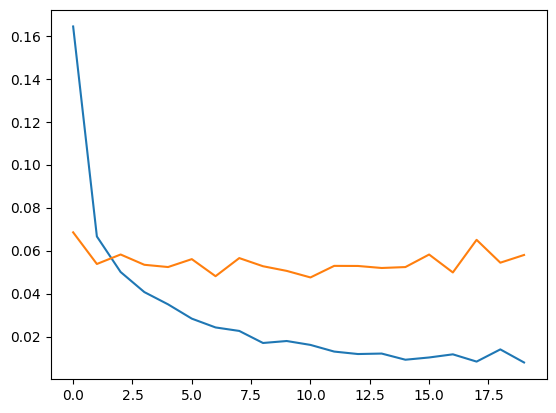

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

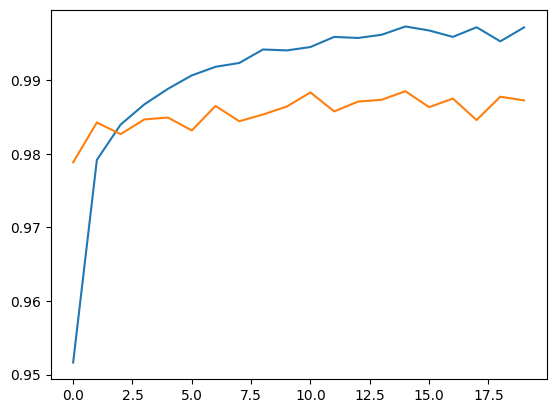

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

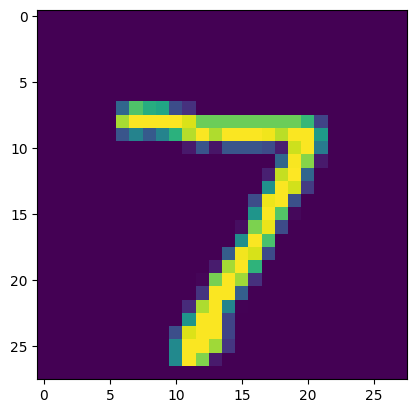

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[4.0909296e-08, 2.9192423e-08, 2.6933736e-07, 2.4891656e-07,
        9.8823494e-10, 3.1097290e-08, 1.3038579e-13, 9.9999142e-01,
        5.4903482e-09, 7.8705380e-06]], dtype=float32)

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([7])

# As we can our model has predicted the right outcome

In [ ]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([1])

Ok so outpu for the 6th element is 1 let's check if 6th element is 1 or not

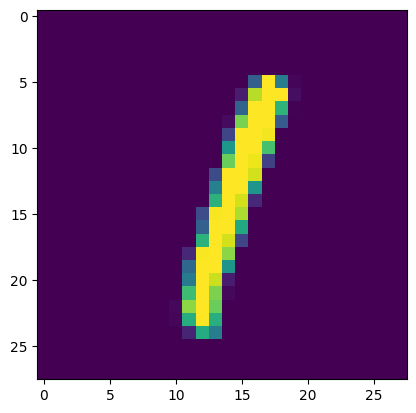

In [ ]:
plt.imshow(X_test[5])

Ok so the element is actually 1 the same as we predicted so our prediction is correct

In [ ]:
# let's  use slicing and predict from 10th to 20th elements
model.predict(X_test[9:20]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

So our predicted output for element from 10 to 20 are these now let's check the real values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


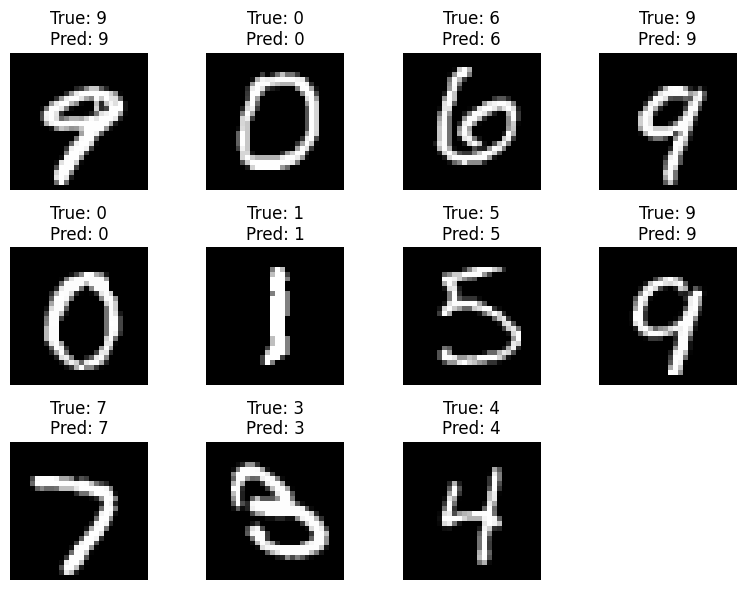

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images_to_display = X_test[9:20]
actual_labels = y_tests[9:20]

predicted_labels_raw = model.predict(X_test[9:20])
predicted_labels = predicted_labels_raw.argmax(axis=1)

num_images = images_to_display.shape[0]

rows = int(np.ceil(num_images / 4))
cols = min(num_images, 4)

plt.figure(figsize=(cols * 2, rows * 2))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images_to_display[i], cmap='gray')
    plt.title(f"True: {actual_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Ok so we predicted everything correctly.Nice!